# ***MODEL BUILDING AND EVALUATION***

## Loading necessary files and libraries

In [ ]:
# Uploading the train.py file
from google.colab import files
uploaded = files.upload()


In [13]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from model_architecture import create_baseline_cnn, create_vgg16_model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,  Dropout, BatchNormalization, MaxPool2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## Loading Data

Training Baseline CNN Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 670s 422ms/step - accuracy: 0.3693 - loss: 1.8071 - precision: 0.5511 - recall: 0.1623 - val_accuracy: 0.5654 - val_loss: 1.2304 - val_precision: 0.7225 - val_recall: 0.4164
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 647s 414ms/step - accuracy: 0.6026 - loss: 1.1293 - precision: 0.7533 - recall: 0.4585 - val_accuracy: 0.6773 - val_loss: 0.9368 - val_precision: 0.8009 - val_recall: 0.5496
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 666s 426ms/step - accuracy: 0.6819 - loss: 0.9224 - precision: 0.7954 - recall: 0.5714 - val_accuracy: 0.7075 - val_loss: 0.8485 - val_precision: 0.8093 - val_recall: 0.6103
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 670s 429ms/step - accuracy: 0.7206 - loss: 0.8013 - precision: 0.8208 - recall: 0.6271 - val_accuracy: 0.7191 - val_loss: 0.8224 - val_precision: 0.7946 - val_recall: 0.6551
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 672s 423ms/step - accuracy: 0.7535 - loss: 0.7187 - precision: 0.8373 - recall: 0.6762 - val_a

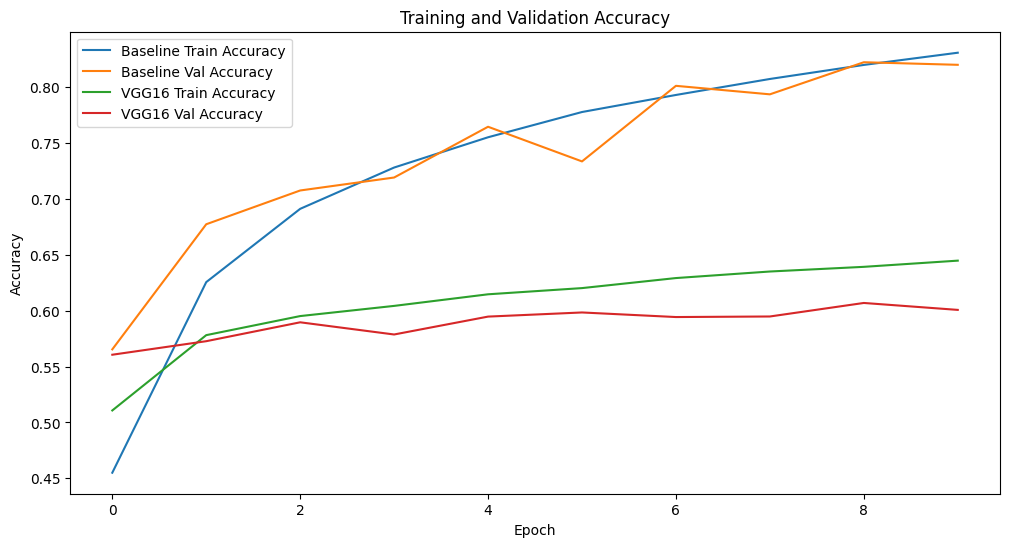

In [ ]:

# Loading the preprocessed data from CSV files
train_data = pd.read_csv('/content/preprocessed_train.csv')
test_data = pd.read_csv('/content/preprocessed_test.csv')

# Separating features and labels
x_train = train_data.iloc[:, 10:].values
y_train = train_data.iloc[:, :10].values
x_test = test_data.iloc[:, 10:].values
y_test = test_data.iloc[:, :10].values

# Reshaping the feature arrays to match the input shape for the models
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# Training the Baseline CNN Model
print("Training Baseline CNN Model...")
baseline_model = create_baseline_cnn(input_shape=(32, 32, 3), num_classes=10)
history_baseline = baseline_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the VGG16 Model
print("Training VGG16 Model...")
vgg16_model = create_vgg16_model(input_shape=(32, 32, 3), num_classes=10)
history_vgg16 = vgg16_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Ploting Training Histories
plt.figure(figsize=(12, 6))
plt.plot(history_baseline.history['accuracy'], label='Baseline Train Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Val Accuracy')
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Val Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


 There is a steady improvement in accuracy on the baseline model, precision, and recall over the epochs.

The final validation accuracy (81.99%) is close to the training accuracy (83.66%), which shows that there is good generalization.

The validation loss is slightly higher than the training loss, which is expected but not alarming.

The VGG16 pre-trained model shows improvement, although the final accuracy (64.59%) and validation accuracy (60.07%) are lower compared to the baseline model.

The validation loss is relatively high, which implies that the model might not be generalizing as well as the baseline model.

Precision and recall are also lower compared to the baseline model.

## Model Training

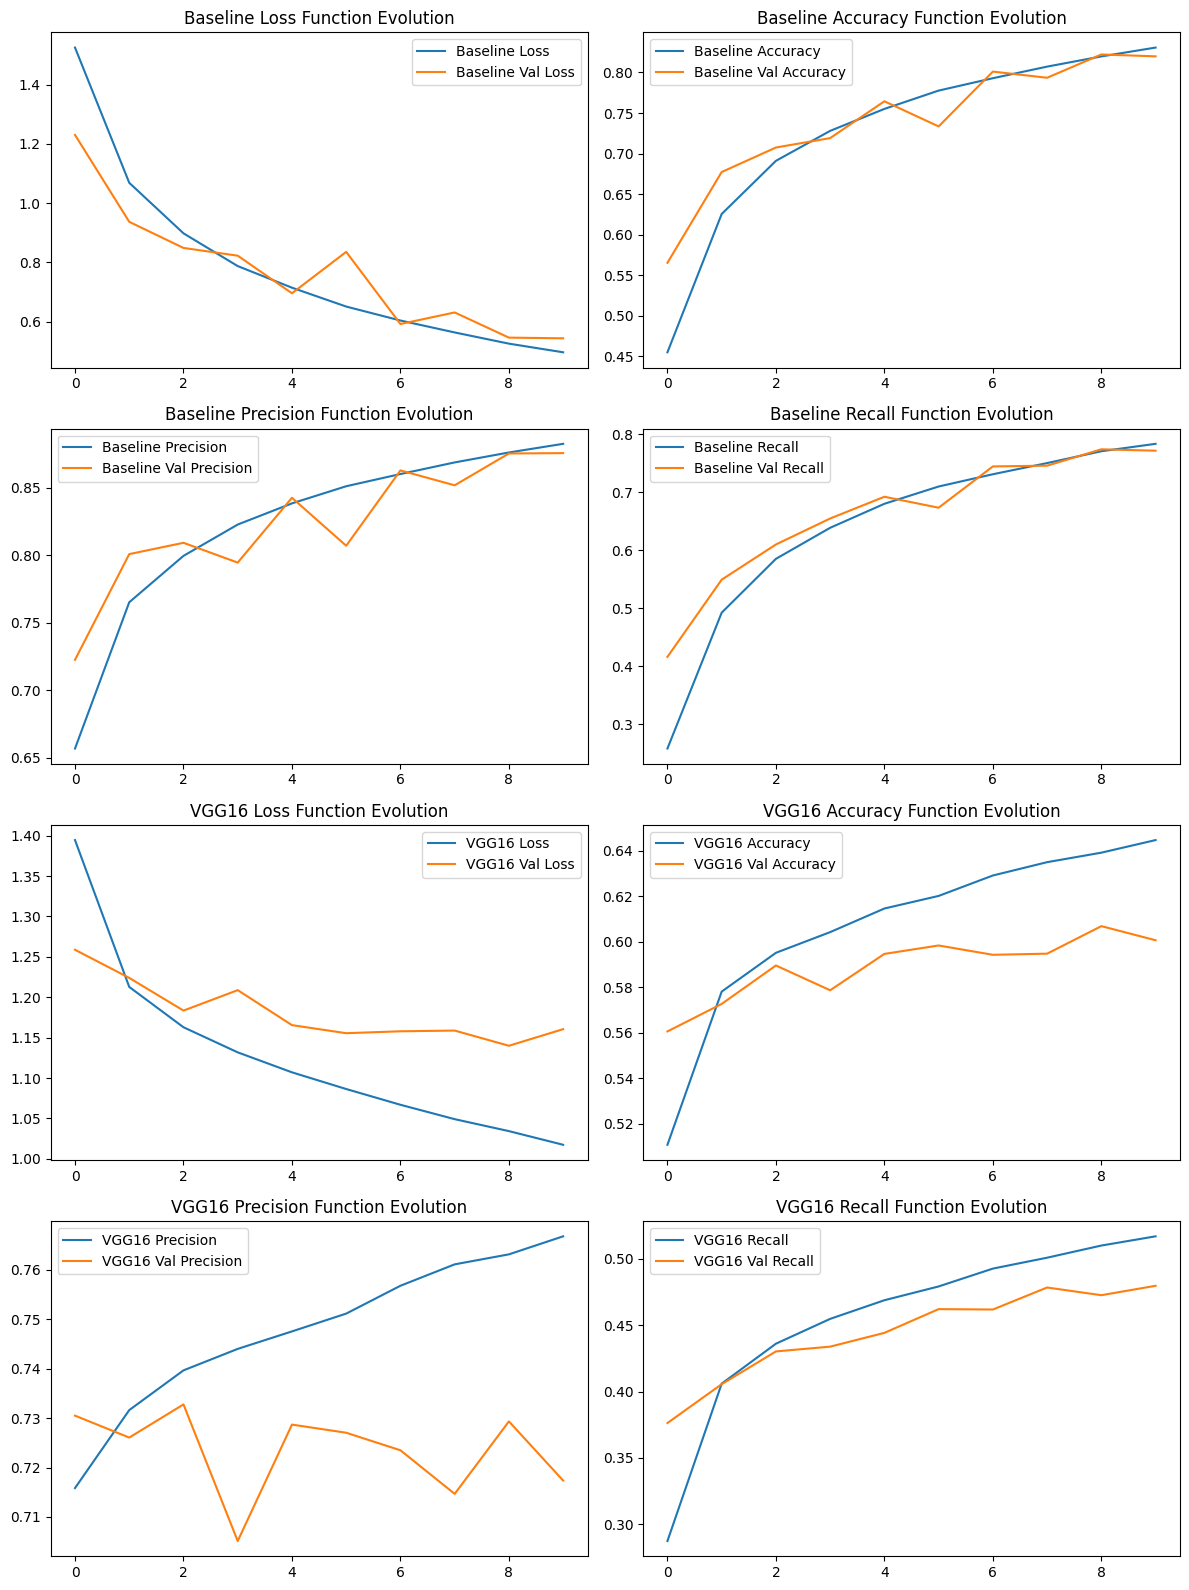

In [ ]:
# Plot Training Histories
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history_baseline.history['loss'], label='Baseline Loss')
plt.plot(history_baseline.history['val_loss'], label='Baseline Val Loss')
plt.title('Baseline Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history_baseline.history['accuracy'], label='Baseline Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Val Accuracy')
plt.title('Baseline Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history_baseline.history['precision'], label='Baseline Precision')
plt.plot(history_baseline.history['val_precision'], label='Baseline Val Precision')
plt.title('Baseline Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history_baseline.history['recall'], label='Baseline Recall')
plt.plot(history_baseline.history['val_recall'], label='Baseline Val Recall')
plt.title('Baseline Recall Function Evolution')
plt.legend()

plt.subplot(4, 2, 5)
plt.plot(history_vgg16.history['loss'], label='VGG16 Loss')
plt.plot(history_vgg16.history['val_loss'], label='VGG16 Val Loss')
plt.title('VGG16 Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Val Accuracy')
plt.title('VGG16 Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 7)
plt.plot(history_vgg16.history['precision'], label='VGG16 Precision')
plt.plot(history_vgg16.history['val_precision'], label='VGG16 Val Precision')
plt.title('VGG16 Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 8)
plt.plot(history_vgg16.history['recall'], label='VGG16 Recall')
plt.plot(history_vgg16.history['val_recall'], label='VGG16 Val Recall')
plt.title('VGG16 Recall Function Evolution')
plt.legend()

plt.tight_layout()
plt.show()



Both the models show increasing precision, recall and accuracies, implying improvement in model performance. However, there are some fluctuations which may signal overfitting.

The loss curves show the training and validation losses over epochs. Both the baseline and the pre-trained models show decreasing loss values,indicating better model convergence and predictive performance.

## Model Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 165s 526ms/step - accuracy: 0.5962 - loss: 1.1607 - precision: 0.7170 - recall: 0.4813
Test Accuracy: 60.07%
313/313 ━━━━━━━━━━━━━━━━━━━━ 164s 523ms/step


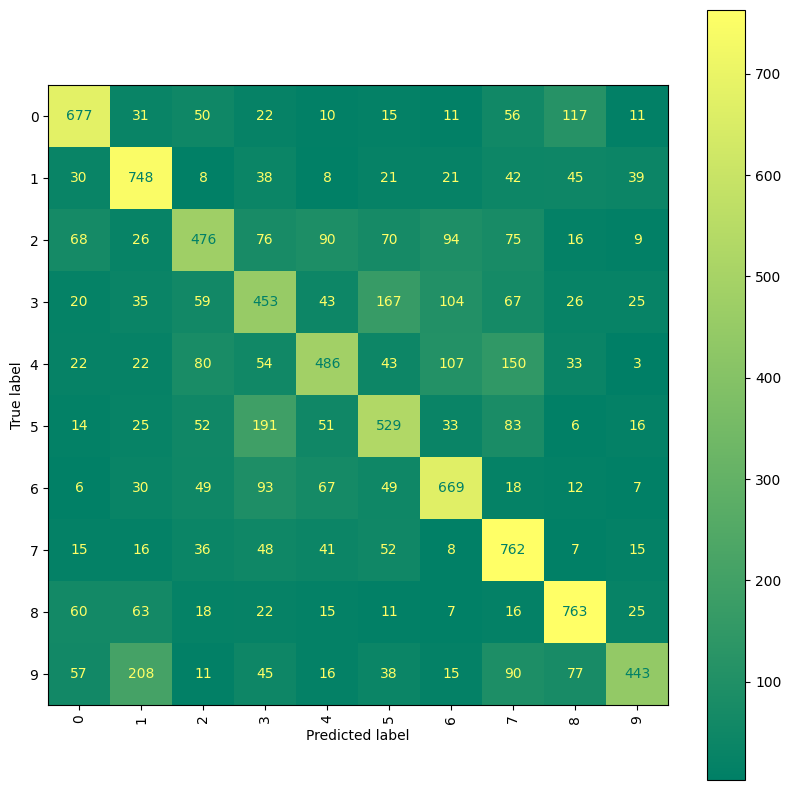

Image 100 is 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
The model predicts that image 100 is 5


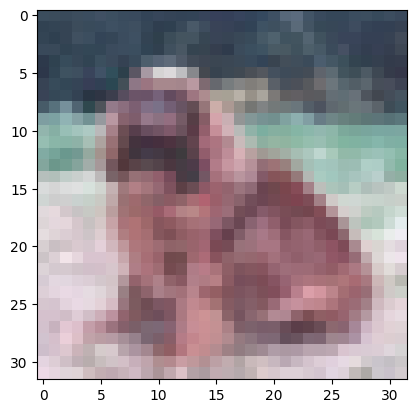

In [ ]:
# Evaluate the VGG16 Model
evaluation = vgg16_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {evaluation[1] * 100:.2f}%')

# Predict and plot confusion matrix
y_pred = vgg16_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_labels, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')
plt.show()

# Display an example image and its prediction
my_image = x_test[100]
plt.imshow(my_image)
print(f"Image 100 is {y_test_labels[100]}")

pred_100 = np.argmax(vgg16_model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predicts that image 100 is {pred_100}")


The model has a precision of 71.70%, suggesting that it is correct 71.70% of the time when it predicts a certain class, which is a good indicator that it is making accurate predictions when it does predict a class.

The general accuracy of 60.07% implies the model correctly classifies 60.07% of the test images, which is a decent starting point, especially for a complex dataset like CIFAR-10.

The recall of 48.13% suggests that the model is missing a significant number of actual positive cases. Even though the model is precise, it is not capturing all the relevant instances.

The loss value of 1.1607 shows the need for improvement in reducing the error in the model's predictions such as data augmentation which introduces the diversity of the training data and improve the model's ability to generalize to new, unseen data.

## Model Fine-tuning

In [9]:
# Load the VGG16 model without the top layers
vgg16_model_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers on top of the base model
x = vgg16_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=vgg16_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in vgg16_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Unfreeze some of the top layers for fine-tuning
for layer in vgg16_model.layers[-4:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall'])

# Fine-tune the model
history_fine = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.4253 - loss: 1.6247 - precision: 0.6566 - recall: 0.1871 - val_accuracy: 0.5483 - val_loss: 1.2741 - val_precision: 0.7234 - val_recall: 0.3575
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5537 - loss: 1.2771 - precision: 0.7157 - recall: 0.3676 - val_accuracy: 0.5778 - val_loss: 1.2020 - val_precision: 0.7434 - val_recall: 0.3942
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5744 - loss: 1.2065 - precision: 0.7254 - recall: 0.4055 - val_accuracy: 0.5936 - val_loss: 1.1624 - val_precision: 0.7420 - val_recall: 0.4228
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5874 - loss: 1.1665 - precision: 0.7377 - recall: 0.4251 - val_accuracy: 0.5936 - val_loss: 1.1488 - val_precision: 0.7543 - val_recall: 0.4291
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6008 - loss: 1.1386 - precision: 0.7469 - recall: 0.4435 - val_accuracy: 0.5991 - val

To improve the performance of the VGG16 model, the model can be fine-tuned by
 unfreezing the top 4 layers of the pre-trained VGG16 model. This allows these layers to be trained on the CIFAR-10 dataset, enabling the model to learn more specific features relevant to the dataset.

The initial fine-tuning phase shows a gradual improvement in both training and validation accuracy, precision, and recall. However, the validation accuracy and loss plateau around Epoch 10, indicating that the model might have reached its initial learning capacity.


 After unfreezing the top layers and fine-tuning with a lower learning rate, there is a significant improvement in both training and validation metrics. The validation accuracy increases to around 74.29%, and the loss decreases to 0.8002, indicating better generalization.

## Saving the models

In [12]:
# Saving the VGG16 Model
vgg16_model.save('vgg16_model.h5')
